### MNIST CNN Project

##### How to work through this project:
- Go cell by cell and finish the marked #TODO's
- You don't need to touch the code marked between the `#---------#`. Those are puzzle pieces that your code will fit into!
    - However, I **STRONGLY** encourage you to understand every single line between those blocks. They are essential!
    - It is crucial that your variable names are what we expect them to be, or the puzzle pieces won't fit.
- Tutorials/helpful information will be placed in the `.md` cells above the "work" cells. Consult them if you are stuck.
- If you REALLY cannot find the correct code to make the cell run, consult the `[proj]-ans.ipynb`.
- The final product (what we expect to see if you run all the cells consecutively) will be placed in the `answers/` directory.
    - Chances are your output won't be the exact same (stochasticity!) but it should be similar

In [1]:
# Get used to these imports!
#----------------------------------------------------------------#
#To install: pip install numpy
import numpy as np 
#To install: pip install matplotlib
import matplotlib.pyplot as plt 
#To install: pip install torchvision
import torchvision as tv
import torchvision.transforms as transforms
#To install: pip install torch (not GPU compatible)
import torch
import torch.nn as nn
#----------------------------------------------------------------#

In [2]:
# Below is the train/test data from F-MNIST. Try and find their shapes
# This is different than normal MNIST! You will see this below
#----------------------------------------------------------------#
train_data = tv.datasets.FashionMNIST('./data', train=True, transform=transforms.ToTensor(), download=True)
test_data = tv.datasets.FashionMNIST('./data', train=False, transform=transforms.ToTensor(), download=True)
#----------------------------------------------------------------#
## TODO: Find and print the shapes of train_data and test_data
# Print the shape of data and the shape of labels
"""
Tips:
- To get just the data from (train/test)_data, you will need to do (train/test)_data.data
- To get just the labels from (train/test)_data, you will need to do (train/test)_data.targets
- Then use .numpy() to convert the data into a numpy array, which you can then call .shape on
"""
print("Shape of train_data data:", train_data.data.numpy().shape)
print("Shape of train_data label:", train_data.targets.numpy().shape)
print("Shape of test_data data:", test_data.data.numpy().shape)
print("Shape of test_data label:", test_data.targets.numpy().shape)

Shape of train_data data: (60000, 28, 28)
Shape of train_data label: (60000,)
Shape of test_data data: (10000, 28, 28)
Shape of test_data label: (10000,)


The following code block is short, but ***incredibly important***. It shows how to set up a **Dataloader** which is needed to pass data through a neural network. Try to get familiar with the syntax.

Notice how even though we have changed the Dataset, the dataloaders are the same. That is why MNIST is so useful! It is very modular.

In [3]:
# Creates dataloaders from the MNIST dataset
batch_size = 60
#----------------------------------------------------------------#
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False) 
#----------------------------------------------------------------#

Lets visualize the data! This will be different than last time since we are working with dataloaders.

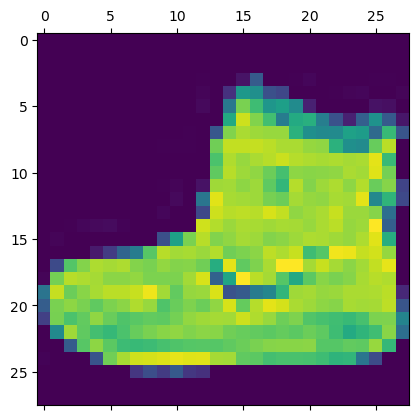

Associated Label: 9


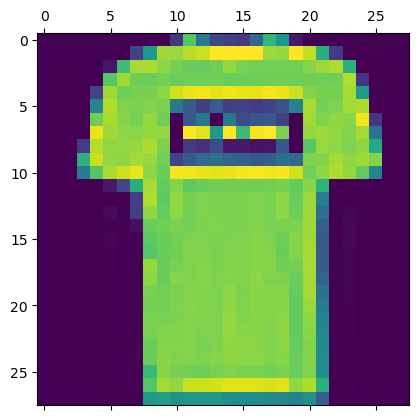

Associated Label: 0


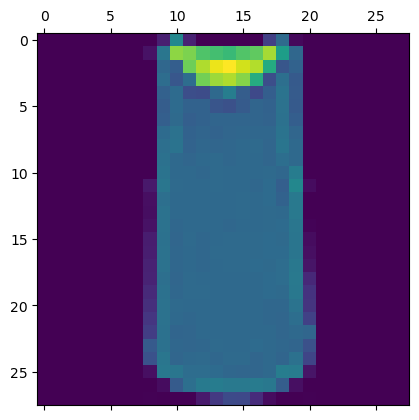

Associated Label: 0


In [4]:
# Visualizes num_to_viz digits and labels with plt.matshow and plt.show. Notice how reshape is used to get the data into proper format for visualization.
# Note the use of reshape!
#----------------------------------------------------------------#
num_of_digits_to_viz = 3
for i in range(num_of_digits_to_viz):
    to_reshape = train_data.data.numpy()[i]
    plt.matshow(to_reshape.reshape(28, 28))
    plt.show()
    print(f"Associated Label: {train_data.targets.numpy()[i]}")
#----------------------------------------------------------------#

So far, this has been similar to the MNIST-DNN Project. When does it diverge? Well first we are going to make a DNN to try and classify these fashion images and then check the accuracy we get. Then we will compare it to the accuracy of a CNN on the **exact same data**.

In [5]:
# Goal: Make a neural network that can classify MNIST
# No example network provided this time! Refer back to Unit 2 if youre stuck on how to make a DNN

## TODO: Create the following required NN class that can work with MNIST data, and then instantiate a model

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
###! MAKE SURE YOUR NEURAL NETWORK HAS AT LEAST 3 HIDDEN LAYERS AND DOES NOT HAVE HARDCODED LAYER SIZE VALUES!###
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# MNIST_DNN: The name of your class
# model: An instance of MNIST_DNN
"""
Tips:
- Think about what input and output sizes you want
- Hidden layers can be most anything, just make sure to reduce gradually
- Remind yourself what activations are and why they are useful
- Make sure to name your class "F_MNIST_DNN"
- Instead of hardcoding the numbers in for the layer sizes, make them passable parameters
- Make sure to actually make your model using model = MNIST_DNN(...) as the last line
"""
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class MNIST_DNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MNIST_DNN, self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size, hidden_size)
    self.l2 = nn.Linear(hidden_size, hidden_size)
    self.l3 = nn.Linear(hidden_size, num_classes)
    self.relu = nn.ReLU()
  def forward(self, x):
    out = self.l1(x)
    out = self.l2(out)
    out = self.relu(out)
    out = self.l3(out)
    return out

model = MNIST_DNN(784, 784, 10).to(device)

__Now your task will be to train and test the model__. Again, refer back to **unit 2** if any of this has slipped from your memory (that is totally fine). However, don't get discouraged at the difficulty because none of this is new! You did it before and can do it again. We have provided the loss function and optimizer, but nothing else.

In [6]:
# Feel free to mess with the code in here once you have finished the project to see what effect it will have.
# For now, though, simply read and accept the syntax as-is
#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adaptive Optimizer
#----------------------------------------------------------------#

## TODO: Implement the training loop for your model. Reference unit 2 example if stuck.
for epoch in range(5):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = loss_func(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{5}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/1000], Loss: 0.5616
Epoch [1/5], Step [200/1000], Loss: 0.4967
Epoch [1/5], Step [300/1000], Loss: 0.7027
Epoch [1/5], Step [400/1000], Loss: 0.4671
Epoch [1/5], Step [500/1000], Loss: 0.3535
Epoch [1/5], Step [600/1000], Loss: 0.2831
Epoch [1/5], Step [700/1000], Loss: 0.5360
Epoch [1/5], Step [800/1000], Loss: 0.3602
Epoch [1/5], Step [900/1000], Loss: 0.2770
Epoch [1/5], Step [1000/1000], Loss: 0.4372
Epoch [2/5], Step [100/1000], Loss: 0.3317
Epoch [2/5], Step [200/1000], Loss: 0.3607
Epoch [2/5], Step [300/1000], Loss: 0.7180
Epoch [2/5], Step [400/1000], Loss: 0.4582
Epoch [2/5], Step [500/1000], Loss: 0.6541
Epoch [2/5], Step [600/1000], Loss: 0.4841
Epoch [2/5], Step [700/1000], Loss: 0.3483
Epoch [2/5], Step [800/1000], Loss: 0.4169
Epoch [2/5], Step [900/1000], Loss: 0.5050
Epoch [2/5], Step [1000/1000], Loss: 0.3296
Epoch [3/5], Step [100/1000], Loss: 0.3422
Epoch [3/5], Step [200/1000], Loss: 0.3054
Epoch [3/5], Step [300/1000], Loss: 0.4982
Epoch [3/

Here is the testing loop again. Run it to see how your accuracy is! 

Then run all your code and see what your **final accuracy** is!

In [7]:
# Note the use of torch.no_grad() and torch.max(). Be sure you know what they are doing
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item() 
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %') 
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 85.88 %


Expected accuracy: ~80%

Great job! We have made a DNN classifier for F-MNIST. Hopefully you are comfortable making models now, **since you will now be making a CNN!**

Let's see if the CNN's architectural differences will allow it to score higher than a standard DNN.

Check out these resources. The tutorial is **especially** helpful:
- [Conv2d Documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [F_MNIST with a CNN Tutorial](https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118)

In [8]:
# Goal: Make a convolutional neural network that can classify F-MNIST
# Provided below is a syntactical example of a CNN, study it and try and make one that will fit F-MNIST

class CNN_EXAMPLE(nn.Module):
    def __init__(self):
        super(CNN_EXAMPLE, self).__init__()

        # Structure
        input_channels = 1 # Represents the number of color channels an image has. We are working with grayscale so it will be 1. RGB would be 3.

        # Convolutional Layers
        self.conv_l1 = nn.Conv2d(in_channels=input_channels, out_channels=5, kernel_size=(3, 3), stride=1)

        # Feedforward Layers
        self.ff1 = nn.Linear(845, 10) # The input number selected here is dependent on the size of the output from the previous layers. You can do some printing of shapes to figure out what it should be.

        # Maxpool Layers
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2)

        # Activations
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()


    def forward(self, input):
        x = self.conv_l1(input)
        x = self.sigmoid(x)
        x = self.maxpool(x)

        x = torch.flatten(x, 1)

        print(x.detach().numpy().shape) # Can help you find the necessary input size for the feedforward part!!!

        output = self.ff1(x)

        return output

## TODO: Create the following required NN class that can work with MNIST data, and then instantiate a model

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#
###! MAKE SURE YOUR NEURAL NETWORK HAS AT LEAST 2 CONVOLUTION LAYERS! THE EXAMPLE ONLY HAS 1 !###
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!#

# F_MNIST_CNN: The name of your class
# f_model: An instance of F_MNIST_CNN
"""
Tips:
- The transition from convolutional to linear layers is tough
    - Print out the shape of the object right before it is supposed to go into the linear layer to find out how big the layer input size should be
    - **You may need to make the training loop in advance to do this**
- When you flatten, do it exactly as shown in the example (x = torch.flatten(x, 1)) to ensure you flatten across the right dimension
- Ignore the first dimension when printing out the shape of x before flattening (as shown above in the example), since it is the batch size
- Make sure to name your class "F_MNIST_CNN"
- Instead of hardcoding the numbers in for the input channels and output size, make them passable parameters
- Make sure to actually make your model using f_model = F_MNIST_DNN(...) as the last line
"""

class F_MNIST_CNN(nn.Module):
    def __init__(self):
        super(F_MNIST_CNN, self).__init__()

        # Structure
        input_channels = 1

        # Convolutional Layers
        self.conv_l1 = nn.Conv2d(in_channels=input_channels, out_channels=16, kernel_size=(5, 5), stride=1, padding=2)
        self.conv_l2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5, 5), stride=1, padding=2)

        # Feedforward Layers
        self.ff1 = nn.Linear(1568, 10)

        # Maxpool Layers
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2))

        # Activations
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()

    def forward(self, input):
        x = self.conv_l1(input)
        x = self.sigmoid(x)
        x = self.maxpool(x)
        x = self.conv_l2(x)
        x = self.sigmoid(x)
        x = self.maxpool(x)

        x = torch.flatten(x, 1)

        output = self.ff1(x)

        return output

f_model = F_MNIST_CNN().to(device)

Below is where you should make your training loop. It will be very similar to the DNN training loop **with some slight alterations**.

In [9]:
# Feel free to mess with the code in here once you have finished the project to see what effect it will have.
# For now, though, simply read and accept the syntax as-is
#----------------------------------------------------------------#
loss_func = nn.CrossEntropyLoss() # Mean Squared Error
optimizer = torch.optim.Adam(f_model.parameters(), lr=0.01) # Adaptive Optimizer
#----------------------------------------------------------------#

## TODO: Implement the training loop for your model

"""
Tips:
- Is there any need to reshape at all? Think about what a convolution acts on dimension-wise
- Everything except for the thing mentioned above will be the same!
"""

for epoch in range(5):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = f_model(images).to(device)
        loss = loss_func(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{5}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/1000], Loss: 2.3035
Epoch [1/5], Step [200/1000], Loss: 2.3002
Epoch [1/5], Step [300/1000], Loss: 2.2583
Epoch [1/5], Step [400/1000], Loss: 0.8879
Epoch [1/5], Step [500/1000], Loss: 0.7794
Epoch [1/5], Step [600/1000], Loss: 0.6423
Epoch [1/5], Step [700/1000], Loss: 0.4063
Epoch [1/5], Step [800/1000], Loss: 0.5729
Epoch [1/5], Step [900/1000], Loss: 0.6111
Epoch [1/5], Step [1000/1000], Loss: 0.5668
Epoch [2/5], Step [100/1000], Loss: 0.4438
Epoch [2/5], Step [200/1000], Loss: 0.6632
Epoch [2/5], Step [300/1000], Loss: 0.2379
Epoch [2/5], Step [400/1000], Loss: 0.3612
Epoch [2/5], Step [500/1000], Loss: 0.5069
Epoch [2/5], Step [600/1000], Loss: 0.7979
Epoch [2/5], Step [700/1000], Loss: 0.3124
Epoch [2/5], Step [800/1000], Loss: 0.2813
Epoch [2/5], Step [900/1000], Loss: 0.2318
Epoch [2/5], Step [1000/1000], Loss: 0.4149
Epoch [3/5], Step [100/1000], Loss: 0.3608
Epoch [3/5], Step [200/1000], Loss: 0.3952
Epoch [3/5], Step [300/1000], Loss: 0.3710
Epoch [3/

Here is the testing loop again. Run it to see how your accuracy is! 

Then run all your code and see what your **final accuracy** is!

In [10]:
# Note the use of torch.no_grad() and torch.max(). Be sure you know what they are doing
#----------------------------------------------------------------#
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = f_model(images).to(device)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item() 
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %') 
#----------------------------------------------------------------#

Accuracy of the network on the 10000 test images: 87.36 %


Expected accuracy ~85%

Looks like the CNN did do better! Feel free to mess with the parameters to see if you can get a better score. **Note that CNNs are more finnicky than DNNs, so your score may tank sometimes**.

### Congratulations on completing the project! Check your results with the notebook in the `answers` directory and then send your final accuracy to your club/channel/mentor!